## Import settings

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rng = np.random.default_rng(seed = 10)

## Overfitting

Let us now use the same example that we saw in the linear regression notebook to study overfitting. In out toy dataset, we shall use p = 20 (where it was p = 8 earlier). Now, we will also have a traininga dn validation dataset.Both of them will have n = 20 data points, sampled from the same underlying distribution.

## Dataset

In [3]:
n = 20
x = np.linspace(-1, 1, 2 * n)
p = 20
X = np.array([x ** i for i in range(p + 1)])
y_true = np.sin(2 * np.pi * x)
y = y_true + rng.normal(0, 0.2, 2 * n)
x_train, X_train, y_train = x[ : : 2], X[ : , : :2], y[ : : 2]       # take even rows
x_valid, X_valid, y_valid = x[1 : : 2], X[ : , 1::2], y[1 : : 2] # take odd rows

## Visualize

Let us visualize the training data and validation data in the same plot.

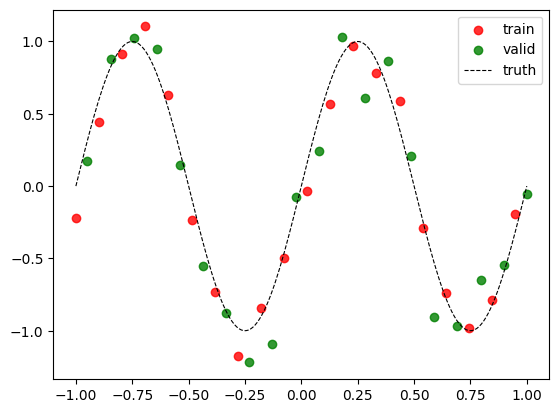

In [4]:
plt.scatter(x_train, y_train,
            alpha = 0.8,
            color = 'red',
            label = 'train')

plt.scatter(x_valid, y_valid,
            alpha = 0.8,
            color = 'green',
            label = 'valid')
x_vis = np.linspace(-1, 1, 200)
y_true_vis = np.sin(2 * np.pi * x_vis)
plt.plot(x_vis, y_true_vis,
         linestyle = '--',
         color = 'black',
         linewidth = 0.8,
         label = 'truth')

plt.legend()

## Normal Equations  

We will now use a linear regression and see what happends.

In [5]:
w_linear = np.linalg.pinv(X_train.T) @ y_train

### Visualize

In [6]:
def visualize(w) :
  plt.scatter(x_train, y_train,
              alpha = 0.8,
              color = 'red',
              label = 'train')
  plt.scatter(x_valid, y_valid,
              alpha = 0.8,
              color = 'green',
              label = 'valid')

  x_vis = np.linspace(-1, 1, 200)
  y_true_vis = np.sin(2 * np.pi * x_vis)

  y_pred_vis = np.array([w[i] * (x_vis ** i) for i in range(w.shape[0])])
  y_pred_vis = y_pred_vis.sum(axis = 0)

  plt.plot(x_vis, y_pred_vis,
           color = 'red',
           label = 'predicted')

  plt.plot(x_vis, y_true_vis,
           linestyle = '--',
           color = 'black',
           linewidth = 0.8,
           label = 'truth')
  plt.legend()

(-5.0, 5.0)

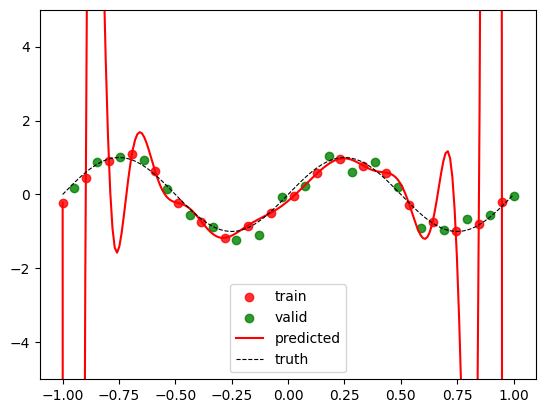

In [7]:
visualize(w_linear)
plt.ylim(-5, 5)

We see the extendt of overfitting here visually. We can also study the magnitudes of the weights involved :

In [8]:
print(np.min(w_linear), np.max(w_linear))

-3074832.51598469 2297121.2998212073


We see the huge magnitudes and a wide range. The polynomial is twisting and turning to ensure that it fits the training data as will as it can, in fact, forcing itself to pass through each data-point. But, it ends up fitting the noise as well.

To get a numerical estimate of the extend of overfitting, let us compare the training and test losses.

## Loss Function

In [11]:
def loss(X, y, w) :
  err = X.T @ w - y
  return (err ** 2).sum()/2

train_loss = loss(X_train, y_train, w_linear)
valid_loss = loss(X_valid, y_valid, w_linear)

print(f"train loss : {train_loss}")
print(f"valid loss : {valid_loss}")

train loss : 1.2308985803562101e-17
valid loss : 6193096.573388016


We see that the training loss is zero!. The regression curve passes through every data point!

# Ridge regression

## Regularized Loss Function

Recall that ridge regression tries to minimize the regularized loss function given by :      


$$
\begin{equation*}
L(\mathbf{X} ,\mathbf{y} ,\mathbf{w}) =\frac{1}{2}\sum\limits _{i=1}^{n}\left(\mathbf{w}^{T}\mathbf{x}_{i} -y_{i}\right)^{2} +\frac{\lambda }{2} ||\mathbf{w} ||^{2}
\end{equation*}
$$

where λ is the regularization rate.

In [12]:
def loss(X, y, w, lamb) :
  err = X.T @ w - y
  return (
      (err ** 2).sum()/2 + (lamb/2) * (w ** 2).sum()
  )

## Closed form solution

Since ride regression makes use of the L2 loss, we still have a closed form expression for the optimal weight vector :      
$$
\begin{equation*}
\mathbf{w}^{*} =\left(\mathbf{XX}^{T} +\lambda \mathbf{I}\right)^{-1}\mathbf{Xy}
\end{equation*}
$$

Since **XXᵀ** is positive semi- definite and λ > 0, we see that the inverse of the matrix mentioned above always exists.

In [16]:
def get_w_ridge(X, y, lamb = 0.1) :
  d, n = X.shape
  return (
      np.linalg.inv(X @ X.T + lamb * np.eye(d)) @ X @ y
  )

w_ridge = get_w_ridge(X_train, y_train, lamb = 0.01)
w_ridge

array([-1.03333864e-01,  2.62262018e+00,  4.84038945e-01, -9.16030942e+00,
        2.22686283e-03,  6.01913400e-01, -3.48533261e-01,  3.52945954e+00,
       -4.57104518e-01,  3.26756606e+00, -3.92762696e-01,  2.07125740e+00,
       -2.29926563e-01,  7.97634438e-01, -1.73378598e-02, -2.87053335e-01,
        2.16010141e-01, -1.13466478e+00,  4.53162554e-01, -1.76889651e+00,
        6.84168059e-01])

## Visualize and compare

Let us now visualize the regression curve and also study the training and validation losses.

Train loss : 1.5049510776098285
Valid loss : 2.459889499040858


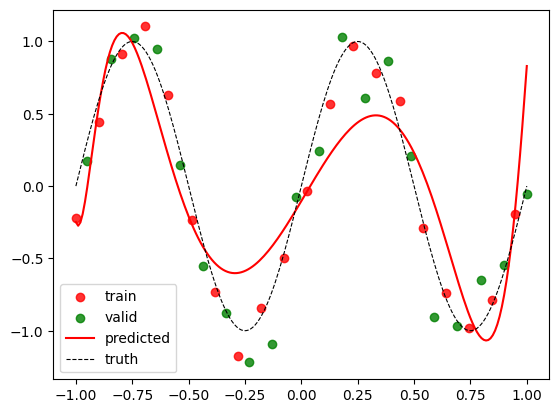

In [19]:
lamb = 0.01
visualize(w_ridge)
train_loss = loss(X_train, y_train, w_ridge, lamb)
valid_loss = loss(X_valid, y_valid, w_ridge, lamb)

print(f"Train loss : {train_loss}")
print(f"Valid loss : {valid_loss}")

This is a much better model. Note that we are now inching closer to how ML is done in practice. Let us now tune the hyperparameter λ on the validation set. For this, we can plot the training and validation loss against $\cfrac{1}{\lambda}$.

(0.0, 10.0)

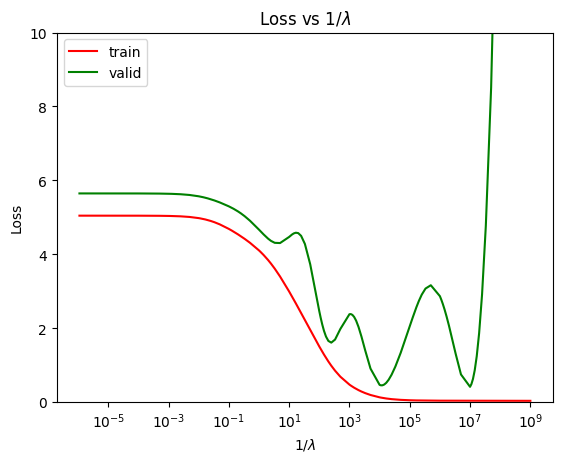

In [26]:
train_losses = [ ]
valid_losses = [ ]
lambs = np.concatenate([
    [i * (10 ** exp) for i in range(1,10)]
    for exp in range(-9, 6)
])

for lamb in lambs :
  w_ridge = get_w_ridge(X_train, y_train, lamb = lamb)
  train_losses.append(loss(
      X_train, y_train, w_ridge, lamb
  ))
  valid_losses.append(loss(
      X_valid, y_valid, w_ridge, lamb
  ))

plt.plot(
    1/lambs,
    train_losses,
    color = 'red',
    label = 'train'
)
plt.xscale('log')
plt.plot(
    1/lambs,
    valid_losses,
    color = 'green',
    label = 'valid'
)
plt.xscale('log')
plt.legend()
plt.title(r"Loss vs $1 / \lambda$")
plt.xlabel(r'$1 / \lambda$')
plt.ylabel('Loss')
plt.ylim(0,10)

Though this is not a classic curve between the loss function and the model complexity, it at least captures the rough behaviour of the model as λ is varied. In the case of the ridge regression, the model complexity is represented by $1 / \lambda$.

In [29]:
best_lamb = lambs[np.argmin(valid_losses)]
print(f'Best validation loss = {np.min(valid_losses)}')
print(f'Best lambda = {best_lamb}')

Best validation loss = 0.4139661803804727
Best lambda = 1e-07


Thus, the best value of λ turns out to be $10^{-7}$.

Train loss = 0.037246012997390596
Validation loss = 0.4139661803804727


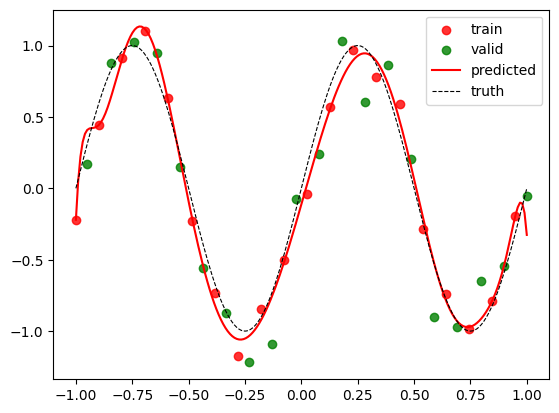

In [30]:
w_ridge = get_w_ridge(
    X_train,
    y_train,
    lamb = best_lamb
)
visualize(w_ridge)
train_loss = loss(X_train, y_train, w_ridge, best_lamb)
valid_loss = loss(X_valid, y_valid, w_ridge, best_lamb)
print(f'Train loss = {train_loss}')
print(f'Validation loss = {valid_loss}')